In [1]:
#HW 7
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fill a vector x with 1000 random numbers between 0 and 1. Then proceed without using any predefined functions or 
#libraries and determine the value and the index of the smallest elements of this vector.

x = np.random.uniform(0,1,1000)
xmin = 1

for i in range(len(x)):
    if x[i] < xmin:
        xmin = x[i]
        indexmin = i
        
print(xmin)
print(indexmin)
        


0.00011381714442371127
871


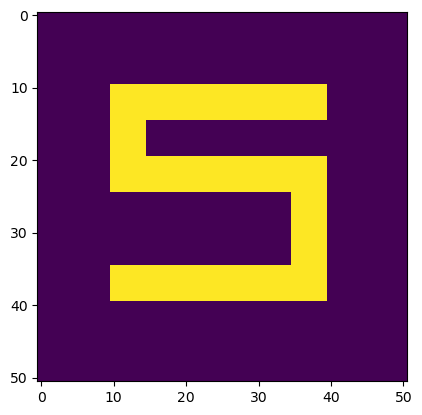

In [3]:
#creating rough shape of s

N = 51
L = 30

S = np.zeros((N,N))

for i in range (10,25):
    for j in range (10,15):
        S[i,j] = 1
        
for i in range(25,40):
    for j in range (35,40):
        S[i,j] = 1       
        
for i in range(35,40):
    for j in range(10,40):
        S[i,j]=1

for i in range(20,25):
    for j in range(10,40):
        S[i,j]=1
        
for i in range(10,15):
    for j in range(10,40):
        S[i,j]=1
    
plt.imshow(S)
plt.show()
        

In [4]:
#question 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

plt.rcParams['animation.ffmpeg_path']=r'C:\ffmpeg\bin\ffmpeg.exe'
from matplotlib.animation import FFMpegWriter
metadata1 = dict(title='Letter S heat equation', artist='Matplotlib')
writer1 = FFMpegWriter(fps=15, metadata=metadata1,bitrate=200000)
metadata2 = dict(title='Letter S heat equation Part 2', artist='Matplotlib')
writer2 = FFMpegWriter(fps=15, metadata=metadata2,bitrate=200000)

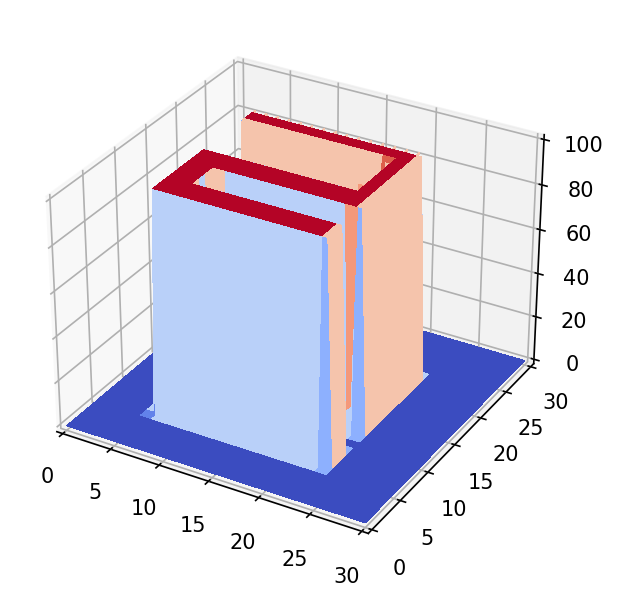

In [5]:
#plotting letter in 2D 

T = np.zeros((N+1,N+1))

for i in range(0,N):
    for j in range(0,N):
        if S[i,j]==1:
            T[i,j]=100 

X = np.linspace(0,L,N+1)
Y = np.linspace(0,L,N+1)
X, Y = np.meshgrid(X,Y)
fig = plt.figure(dpi=150)
fig.clear()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,T,cmap=cm.coolwarm,antialiased=False)
ax.set_xlim3d(0, 30)
ax.set_ylim3d(0, 30)
ax.set_zlim3d(0, 100)
plt.draw()
plt.show()



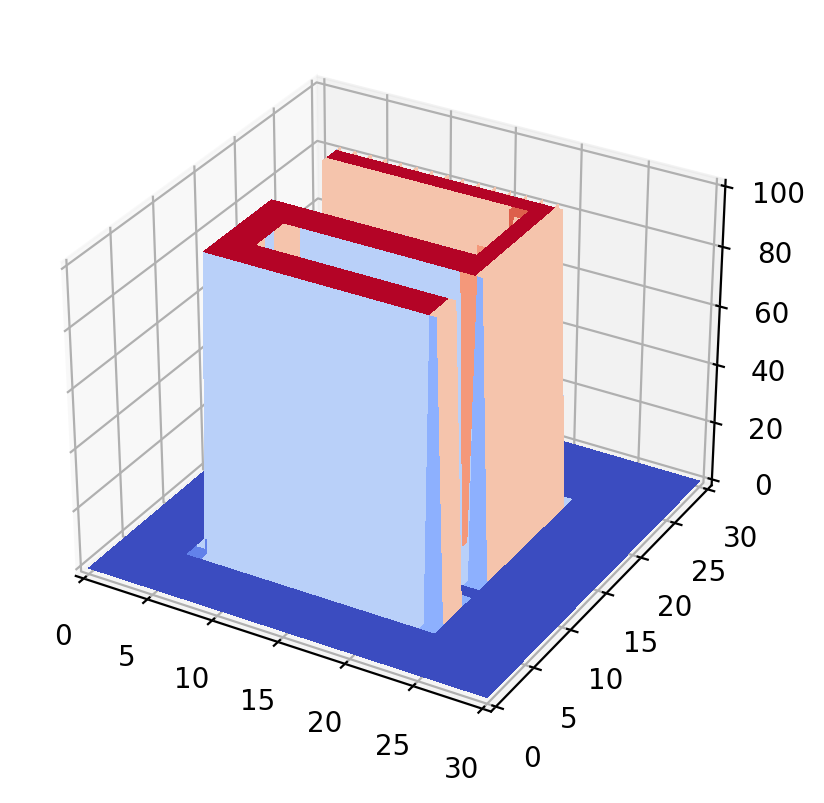

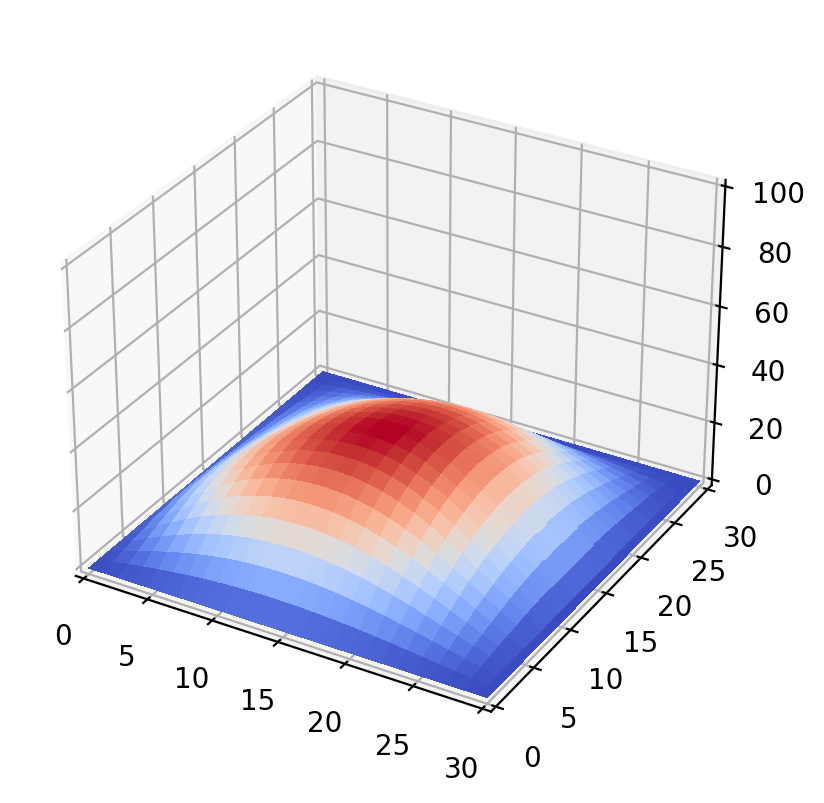

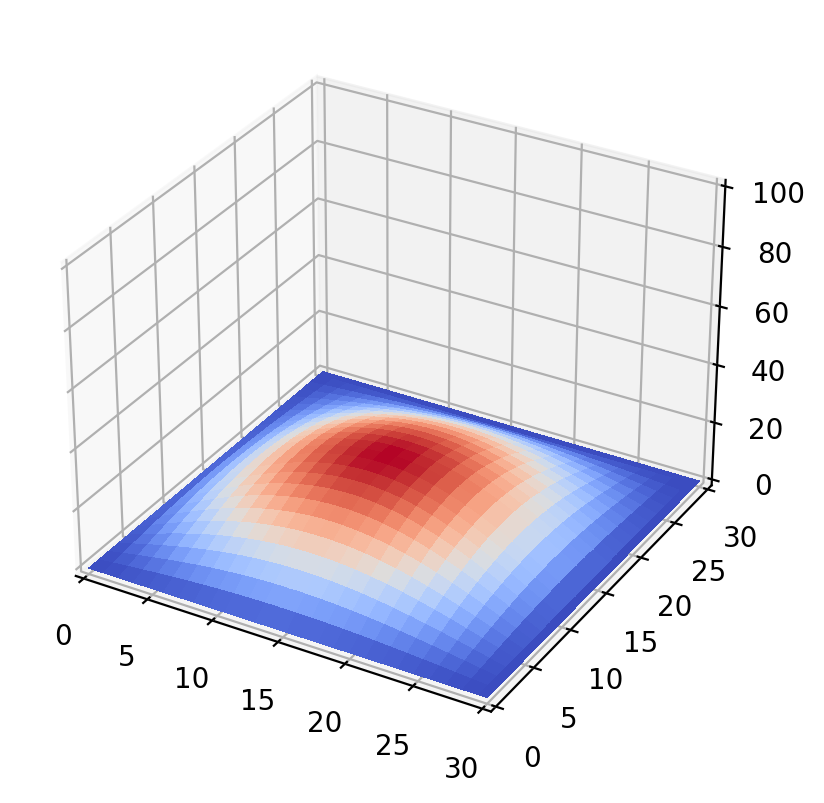

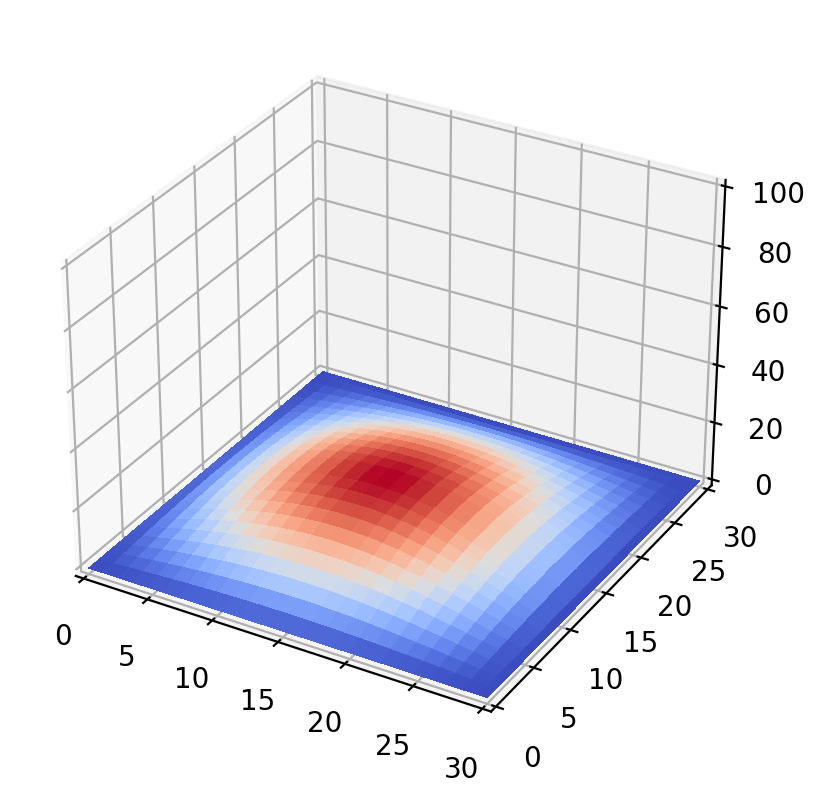

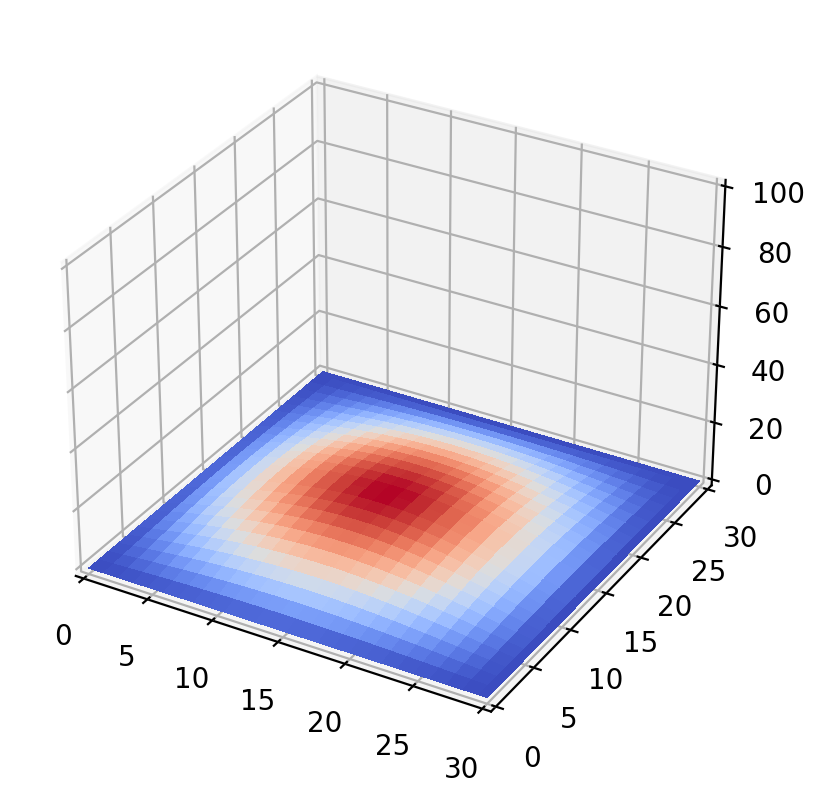

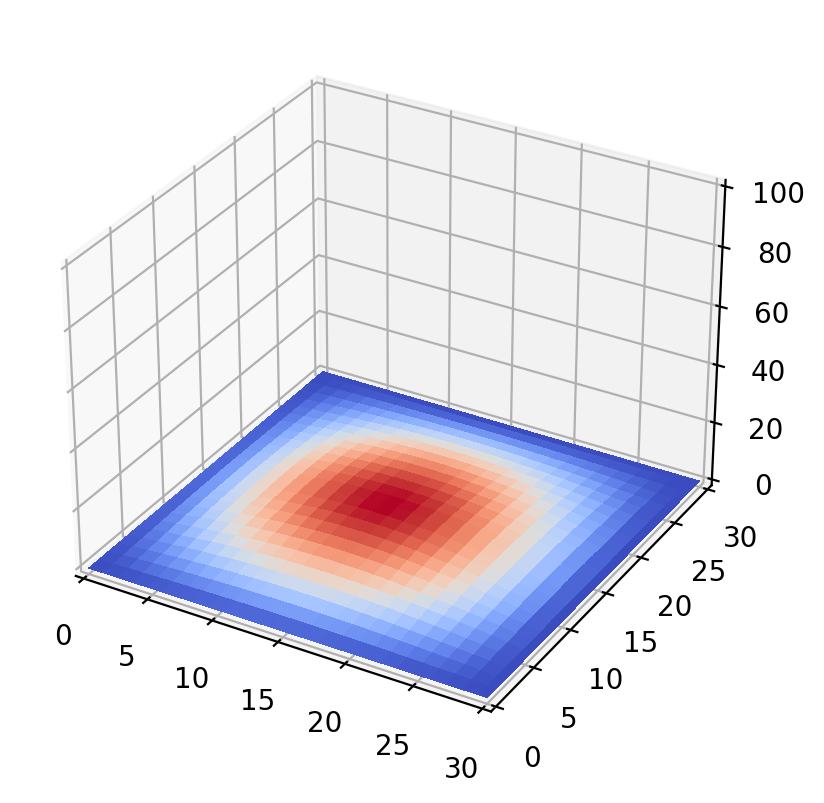

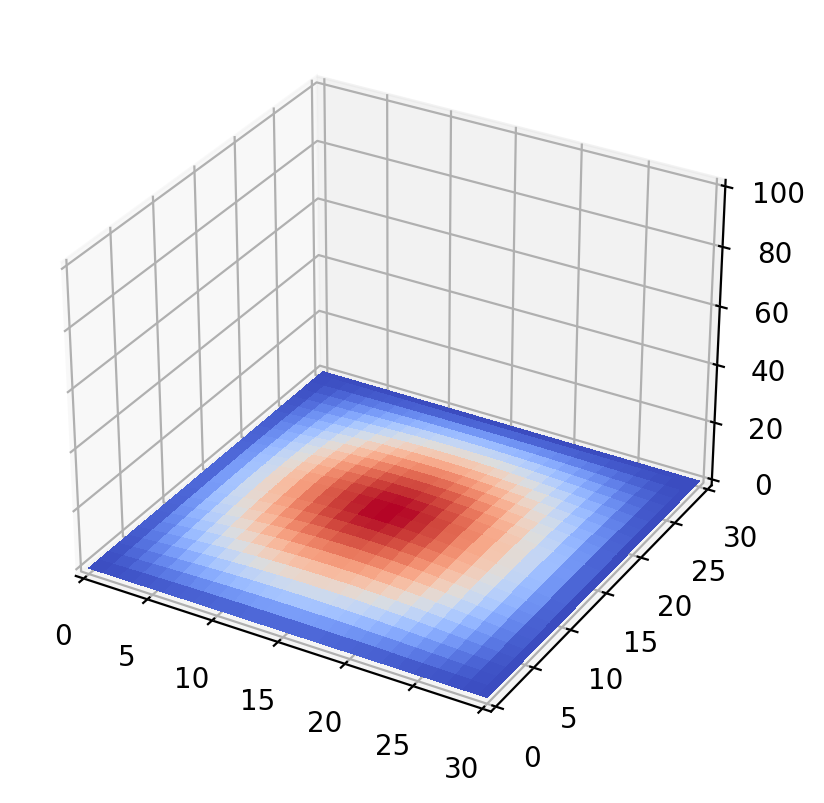

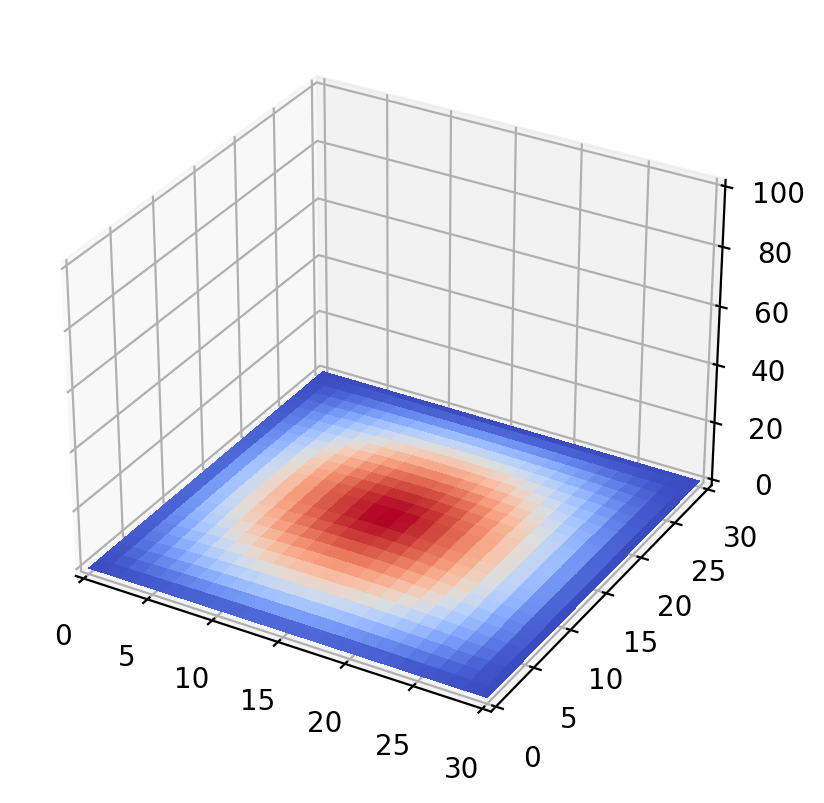

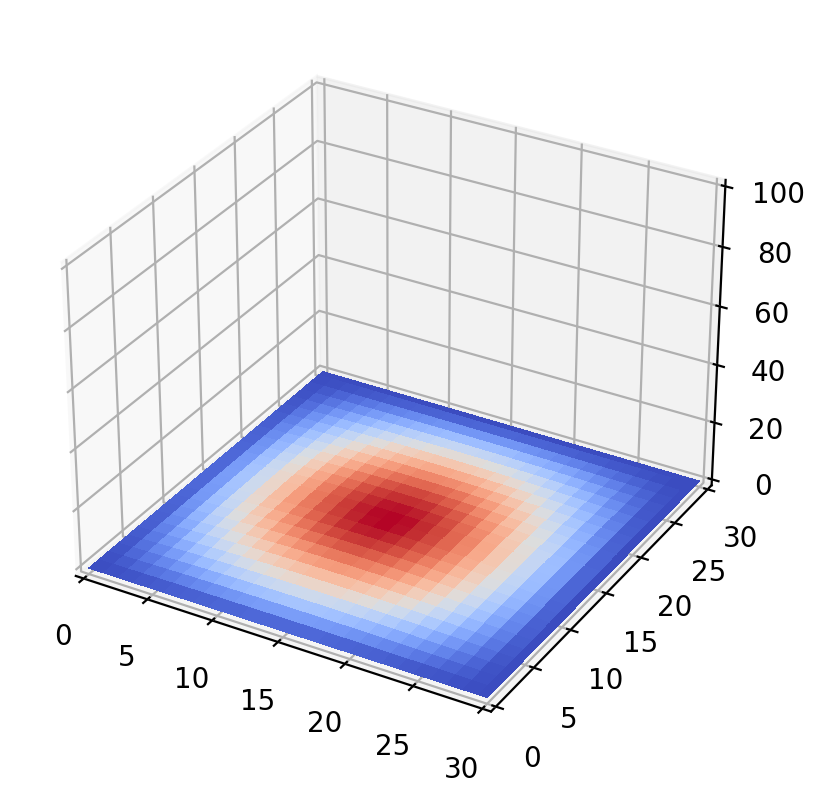

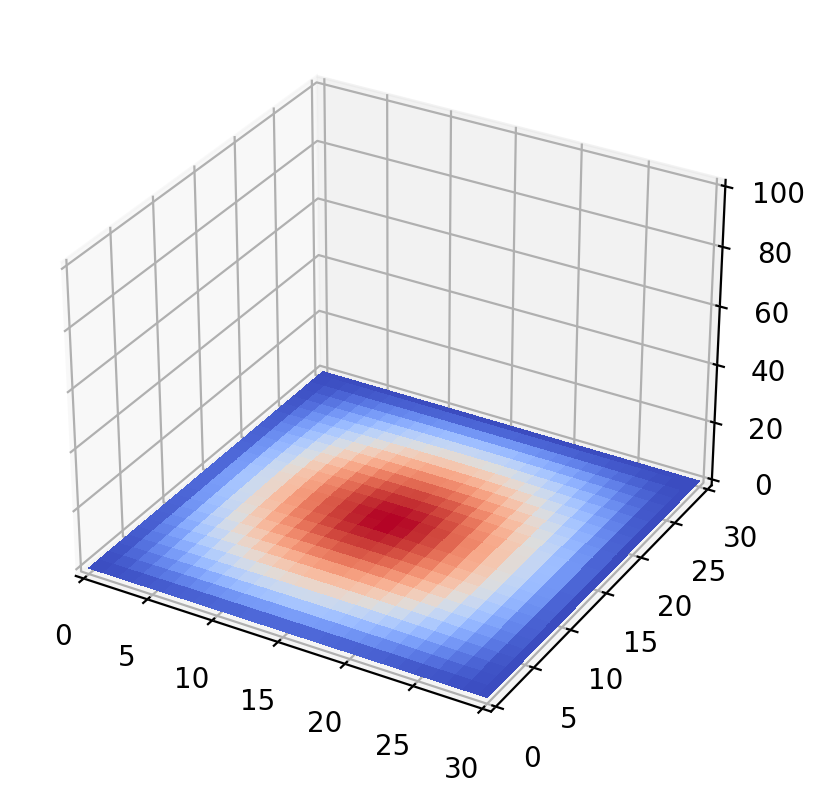

In [6]:

    
with writer1.saving(fig, "LetterS.mp4", dpi=200):
    for _ in range(1000):
        Tnew = np.copy(T)
        
        if _%100 == 0:
            X = np.linspace(0, L, N+1) # where n is number of segments
            Y = np.linspace(0, L, N+1)
            X, Y = np.meshgrid(X, Y)
            fig = plt.figure(dpi=200)
            fig.clear()
            ax = fig.add_subplot(projection='3d')
            ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
            ax.set_xlim3d(0, 30)
            ax.set_ylim3d(0, 30)
            ax.set_zlim3d(0, 100)
            plt.draw()
            plt.pause(0.01)
            writer1.grab_frame()
        for i in range(1,N-1):
            for j in range(1,N-1):
                dxm = T[i-1][j]
                dxp = T[i+1][j]
                dym = T[i][j-1]
                dyp = T[i][j+1]
                Tnew[i][j] = (dxp + dxm + dyp + dym)/4
            T = Tnew
        

plt.show() 

#Mp4 file will not save properly, only saving first frame 

starting temp: 52500.0


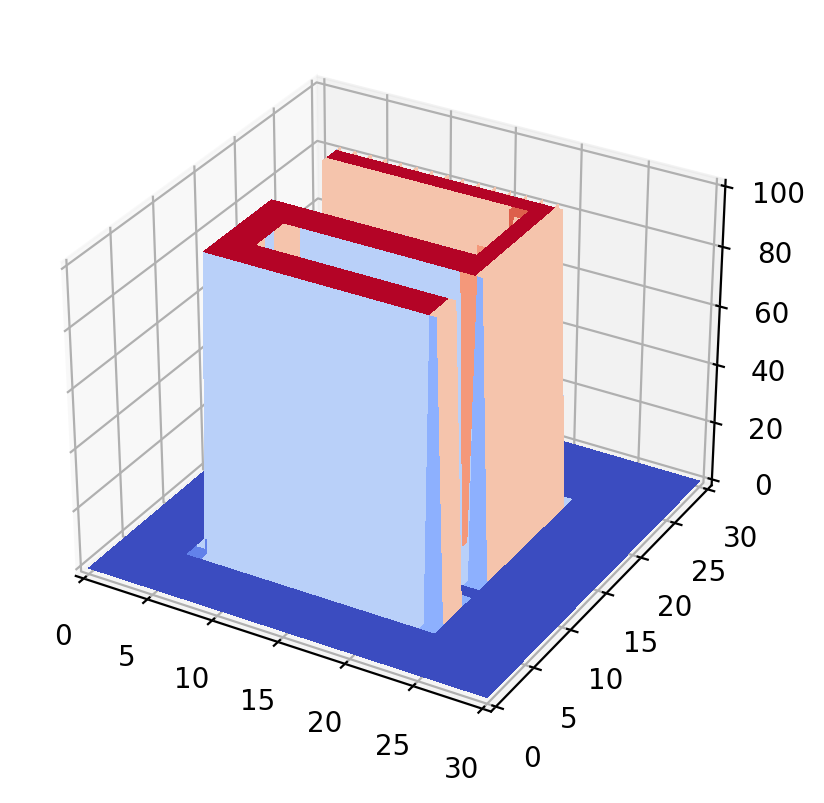

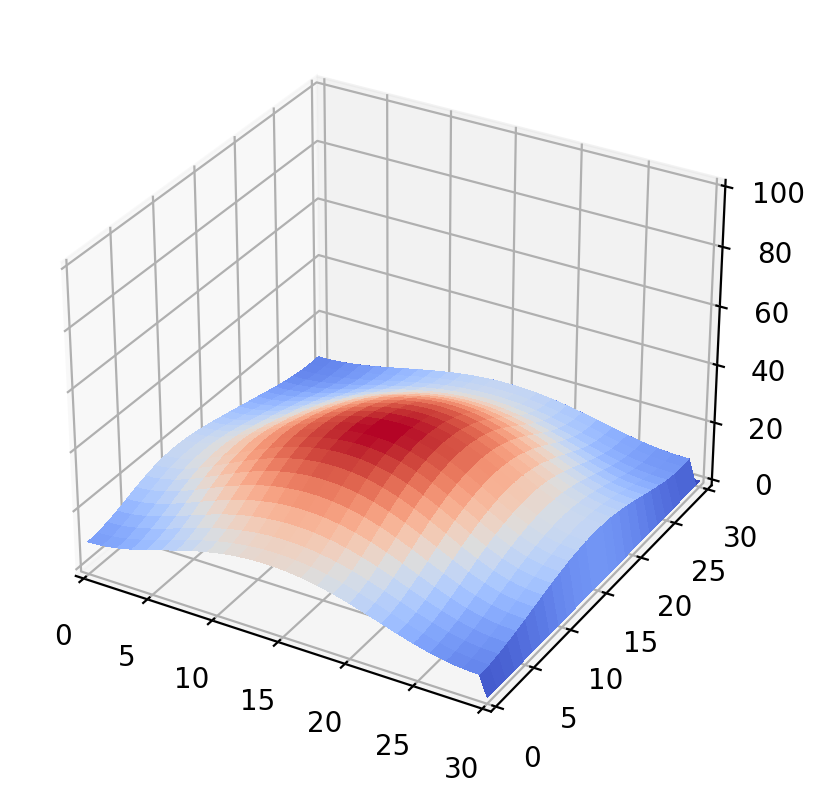

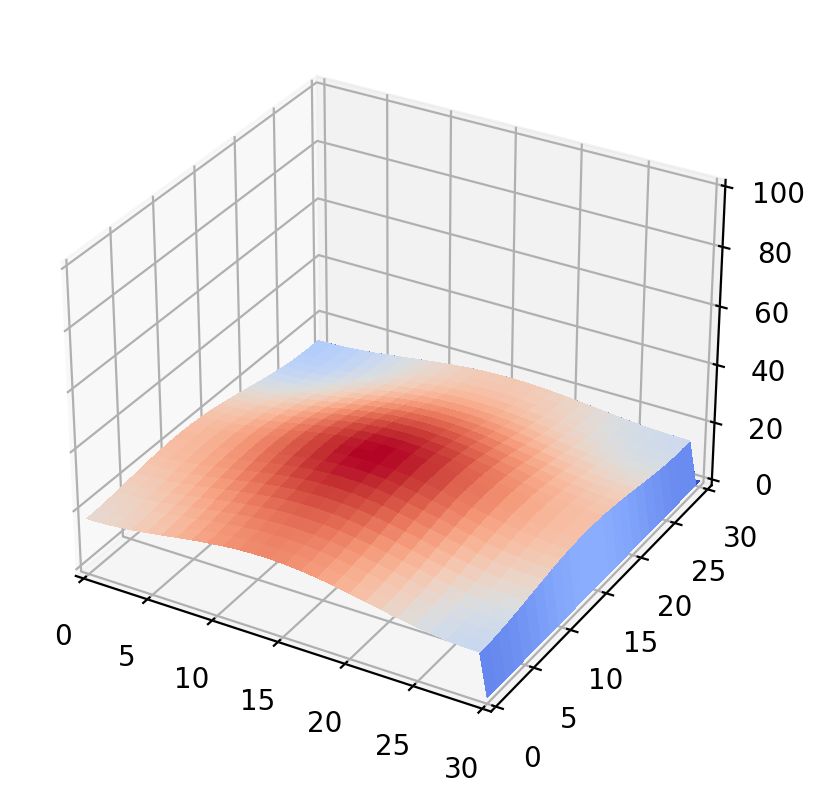

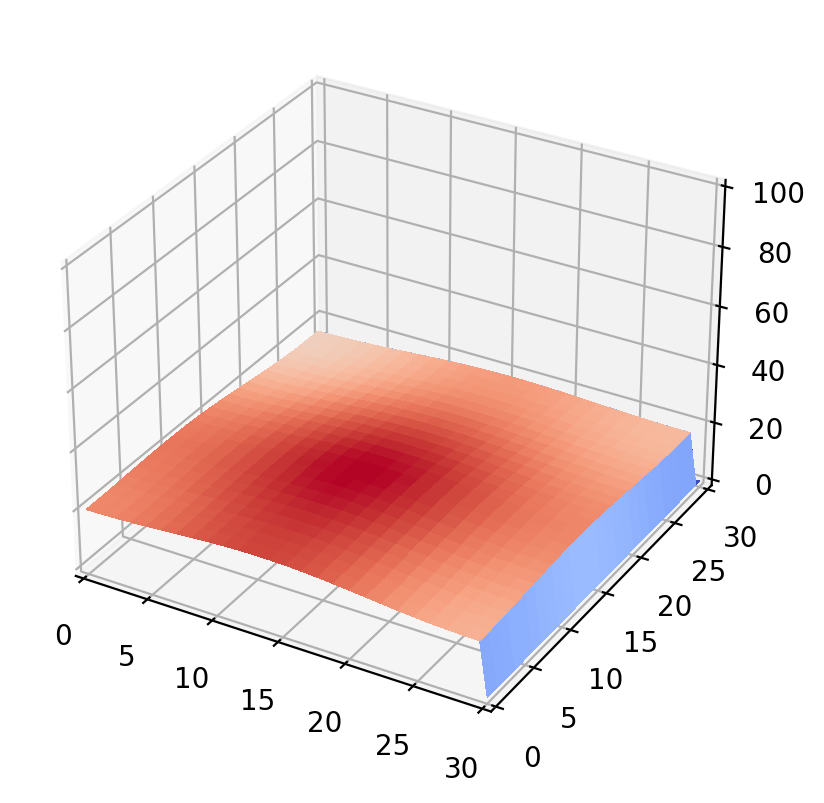

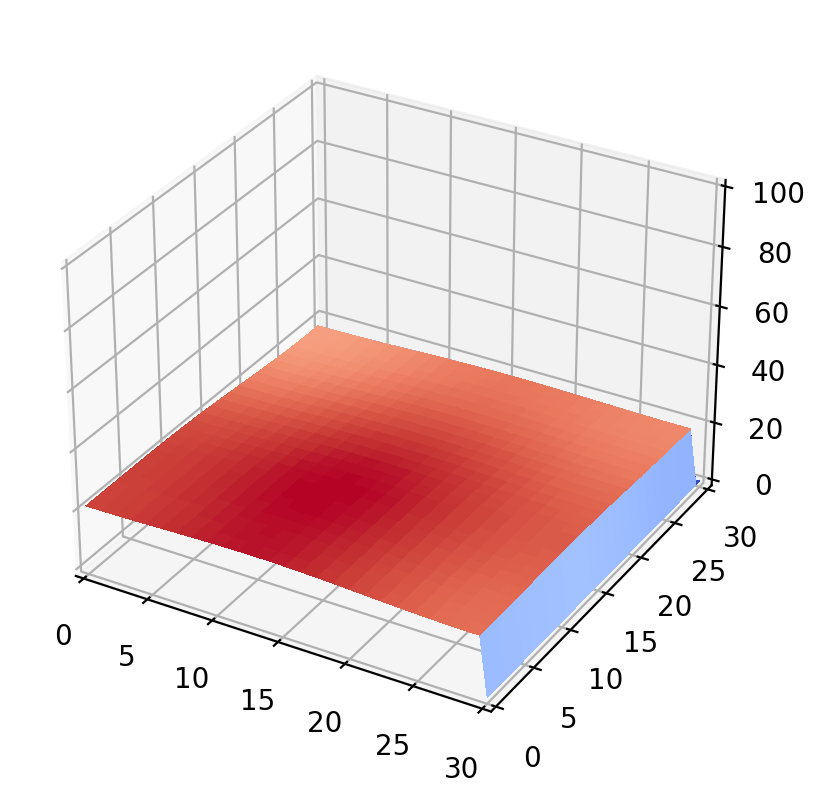

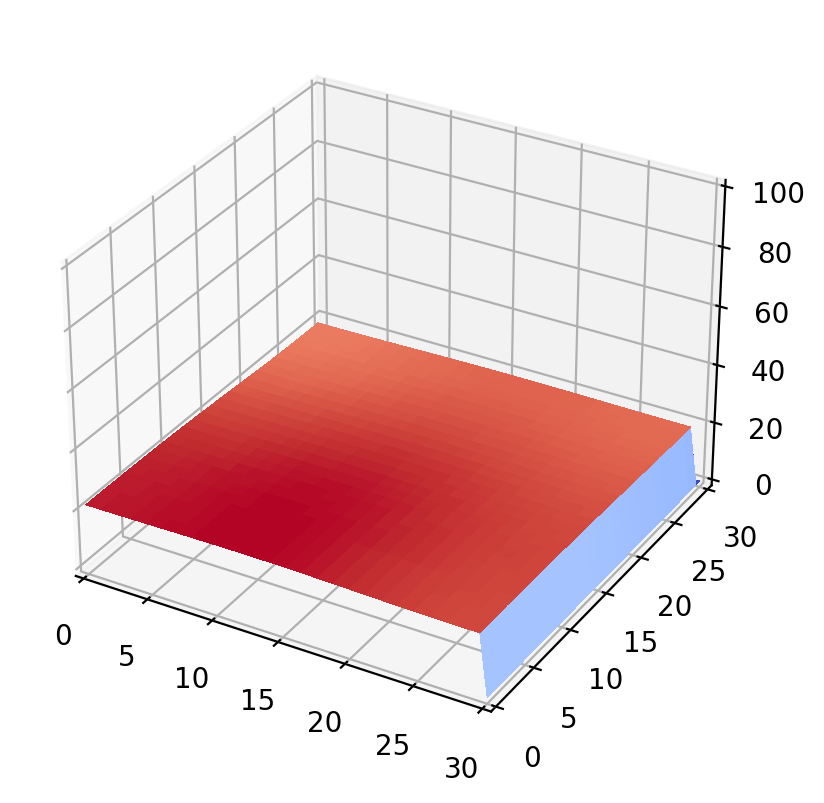

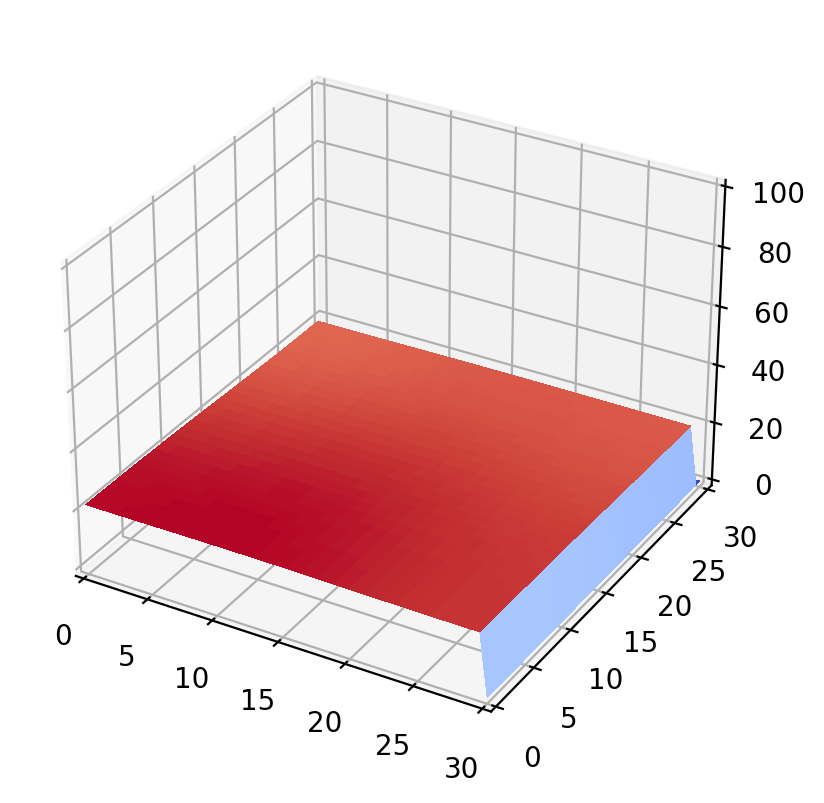

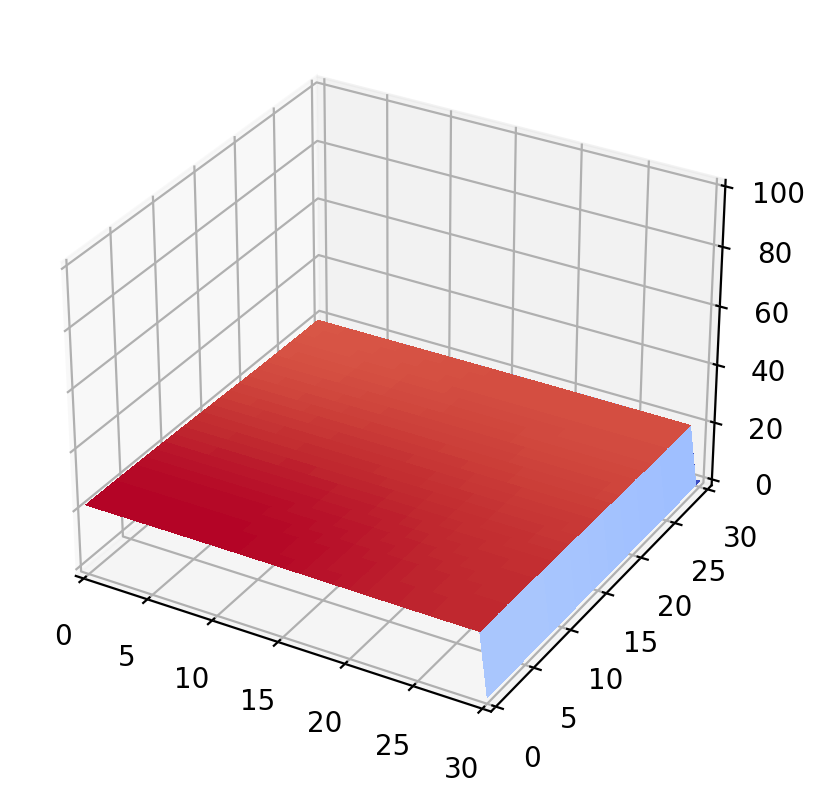

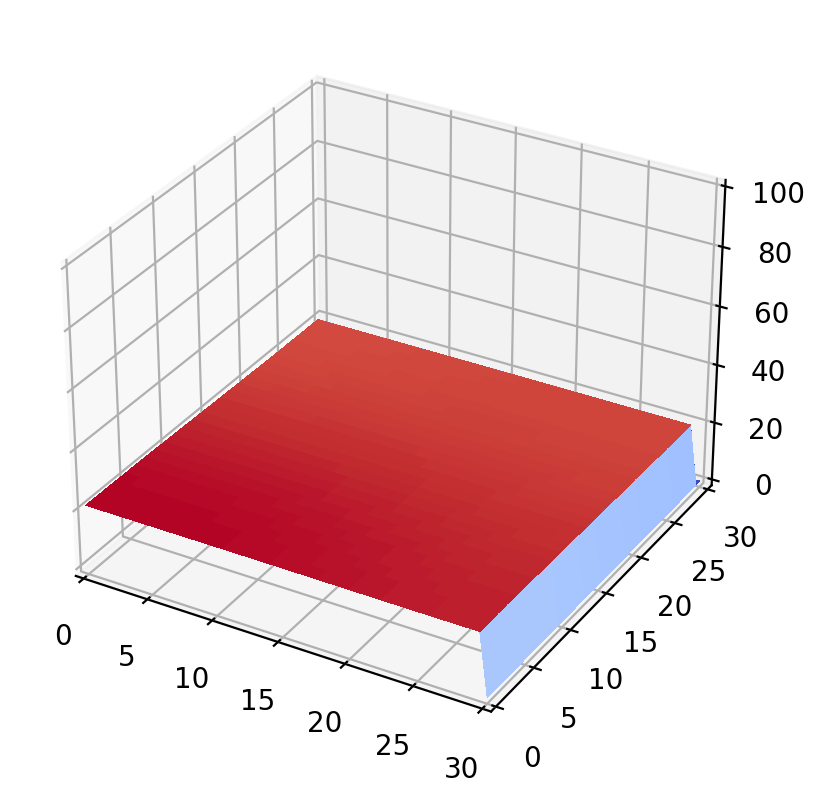

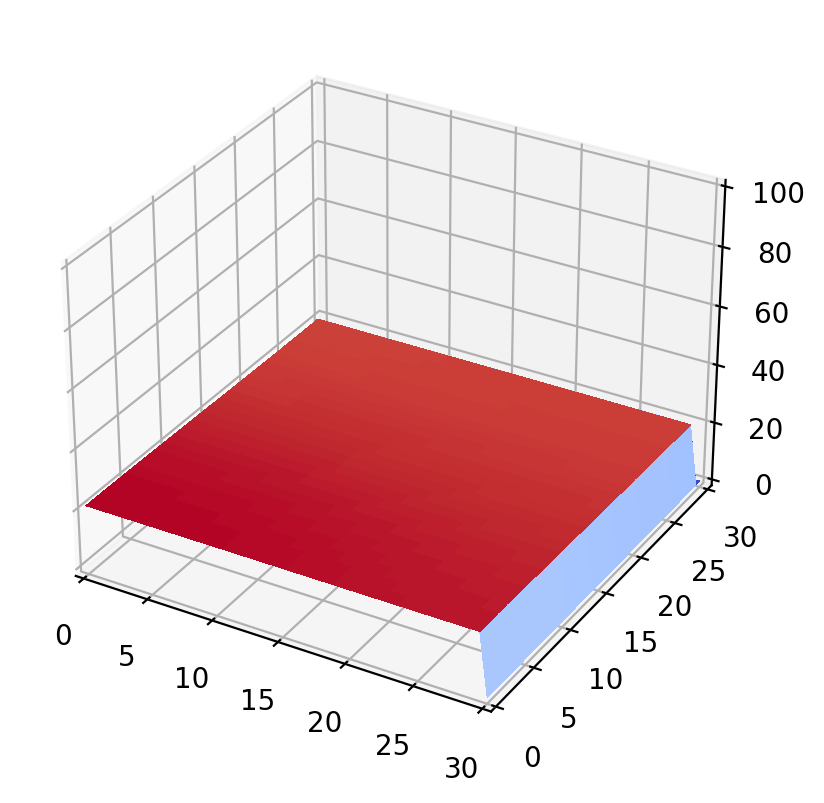

starting temp: 52500.0
final temp: 50150.44092792861


In [7]:
    
T = np.zeros((N+1,N+1))


    
for i in range(0,N):
    for j in range(0,N):
        if S[i,j]==1:
            T[i,j]=100   
 
    
    
with writer1.saving(fig, "LetterS2.mp4", dpi=200):
    for _ in range(1000):
        if _ == 0:#finding orginal temp/starting temp 
            Torg = 0
            for i in range (N-1):
                for j in range(N-1):
                    Torg += T[i,j]
            print("starting temp:",Torg)
        
        Tnew = np.copy(T)
        if _%100 == 0:
            X = np.linspace(0, L, N+1) # where n is number of segments
            Y = np.linspace(0, L, N+1)
            X, Y = np.meshgrid(X, Y)
            fig = plt.figure(dpi=200)
            fig.clear()
            ax = fig.add_subplot(projection='3d')
            ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
            ax.set_xlim3d(0, 30)
            ax.set_ylim3d(0, 30)
            ax.set_zlim3d(0, 100)
            plt.draw()
            plt.pause(0.01)
            writer1.grab_frame()
            
        Ttotal = 0
        for i in range(1,N-1):
            for j in range(1,N-1):
                #movement 
                dxm = T[i-1][j]
                dxp = T[i+1][j]
                dym = T[i][j-1]
                dyp = T[i][j+1]
                Tnew[i][j] = (dxp + dxm + dyp + dym)/4
                #boundary conditions 
                Tnew[i,0] = ( T[i,0] + T[i+1,0] + T[i-1,0] + T[i,1] )/4
                Tnew[i,N-1] = ( T[i,N-2] + T[i+1,N-1] + T[i-1,N-1] + T[i,N-1] )/4
                Tnew[0,j] = ( T[0,j] + T[0,j+1] + T[0,j-1] + T[1,j] )/4
                Tnew[N-1,j] = ( T[N-2,j] + T[N-1,j+1] + T[N-1,j-1] + T[N-1,j] )/4
               
                Tnew[0,0] = ( 2.0*T[0,0] + T[1,0] + T[0,1] )/4
                Tnew[N-1,0] = ( 2.0*T[N-1,0] + T[N-1,1] + T[N-2,0] )/4
                Tnew[0,N-1] = ( 2.0*T[0,N-1] + T[0,N-2] + T[1,N-1] )/4
                Tnew[N-1,N-1] = ( 2.0*T[N-1,N-1] + T[N-1,N-2] + T[N-2,N-1] )/4                
                Ttotal += T[i,j]
                
            T = Tnew

plt.show() 

print("starting temp:",Torg)
print("final temp:",Ttotal)

#mp4 file wont work, only saving 1st frame  